<a href="https://colab.research.google.com/github/morescode-pm/kaggle-speciesnet/blob/test-speciesnet-raw/run_speciesnet_on_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SpeciesNet Colab demo

This notebook:

* Installs the speciesnet package
* Downloads the model
* Copies it to a writeable folder before using it
* Downloads two test images from this repo
* Processes them using both the CLI (i.e., python -m speciesnet.scripts.run_model) and Python code

As is often the case when you !pip install a library on Colab, you will likely have to run the first code cell (which just does "!pip install speciesnet"), then re-start your Colab runtime, then you should be able to run the whole notebook.


## Imports


In [13]:
%pip install speciesnet

Note: you may need to restart the kernel to use updated packages.


In [14]:
from IPython.display import display
from IPython.display import JSON

# from speciesnet import DEFAULT_MODEL
from speciesnet import draw_bboxes
from speciesnet import load_rgb_image
from speciesnet import SpeciesNet
from speciesnet import SUPPORTED_MODELS

In [15]:
def print_predictions(predictions_dict: dict) -> None:
    print("Predictions:")
    for prediction in predictions_dict["predictions"]:
        print(prediction["filepath"], "=>", prediction["prediction"])

## Download model

In [16]:
import kagglehub
import os
import shutil

# Choose the folder we're going to download to
model_path = 'content/models'
os.makedirs(model_path, exist_ok=True)

# Download the model (it will go to a folder like /kaggle/input/...)
download_path = kagglehub.model_download('google/speciesnet/PyTorch/v4.0.1a',
                                          force_download=True)

print('Model downloaded to temporary folder: {}'.format(download_path))

# List the contents of the downloaded directory to identify the actual files/subdirectories
model_files = os.listdir(download_path)
print(model_files)

# Copy the contents of the model file to our destination folder
for item_name in model_files:
    source_path = os.path.join(download_path, item_name)
    destination_path = os.path.join(model_path, item_name)
    if os.path.isfile(source_path):
        shutil.copy2(source_path, destination_path)
    elif os.path.isdir(source_path):
        shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print('{} files copied to: {}'.format(len(model_files),model_path))

100%|██████████| 399/399 [00:00<00:00, 214kB/s]





100%|██████████| 250k/250k [00:00<00:00, 1.98MB/s]





100%|██████████| 119/119 [00:00<00:00, 237kB/s]





100%|██████████| 5.03M/5.03M [00:00<00:00, 14.0MB/s]

100%|██████████| 343k/343k [00:00<00:00, 1.68MB/s]


















































































100%|██████████| 214M/214M [00:05<00:00, 38.4MB/s]

Model downloaded to temporary folder: /Users/oldadministrator/.cache/kagglehub/models/google/speciesnet/PyTorch/v4.0.1a/1
['geofence_release.2025.02.27.0702.json', 'always_crop_99710272_22x8_v12_epoch_00148.labels.txt', 'README.md', 'always_crop_99710272_22x8_v12_epoch_00148.pt', 'info.json', 'taxonomy_release.txt']
6 files copied to: content/models


## Download sample images

In [10]:
os.makedirs('content/images',exist_ok=True)
!wget "https://github.com/google/cameratrapai/blob/main/test_data/african_elephants.jpg?raw=true" -O "content/images/african_elephants.jpg"
!wget "https://github.com/google/cameratrapai/blob/main/test_data/american_black_bear.jpg?raw=true" -O "content/images/american_black_bear.jpg"

--2025-05-19 20:33:39--  https://github.com/google/cameratrapai/blob/main/test_data/african_elephants.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/google/cameratrapai/raw/refs/heads/main/test_data/african_elephants.jpg [following]
--2025-05-19 20:33:39--  https://github.com/google/cameratrapai/raw/refs/heads/main/test_data/african_elephants.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/cameratrapai/refs/heads/main/test_data/african_elephants.jpg [following]
--2025-05-19 20:33:39--  https://raw.githubusercontent.com/google/cameratrapai/refs/heads/main/test_data/african_elephants.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to ra

## Run the model using the CLI

In [17]:
!python -m speciesnet.scripts.run_model --folders 'content/images' --model $model_path --predictions_json 'content/predictions-ensemble.json'

I0519 21:51:53.796562 8750943360 classifier.py:99] Loaded SpeciesNetClassifier in 44.04 seconds on MPS.
I0519 21:51:54.500594 8750943360 detector.py:99] Loaded SpeciesNetDetector in 0.7 seconds on MPS.
I0519 21:51:54.540019 8750943360 ensemble.py:71] Loaded SpeciesNetEnsemble in 0.04 seconds.
Detector predict      :   0%|                             | 0/2 [00:00<?, ?it/s]

Classifier preprocess :   0%|                             | 0/2 [00:00<?, ?it/s]


Classifier predict    :   0%|                             | 0/1 [00:00<?, ?it/s]



Geolocation           :   0%|                             | 0/2 [00:00<?, ?it/s]



Geolocation           :  50%|██████████▌          | 1/2 [00:00<00:00, 32.33it/s]



Detector predict      :  50%|██████████▌          | 1/2 [00:03<00:03,  3.14s/it]

Detector predict      : 100%|█████████████████████| 2/2 [00:03<00:00,  1.58s/it]

Classifier preprocess : 100%|█████████████████████| 2/2 [00:03<00:00,  1.57s/it]


Geolocation           : 100%|█████████████

In [18]:
# print the contents of the output json
import json
with open('content/predictions-ensemble.json','r') as f:
  d = json.load(f)
print(str(d))


{'predictions': [{'filepath': 'content/images/african_elephants.jpg', 'classifications': {'classes': ['55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant', "dc5dbe17-a8ca-40a6-ac6a-3b6b1d63e6d6;mammalia;cetartiodactyla;bovidae;eudorcas;thomsonii;thomson's gazelle", "8c48ed75-e275-4188-a6b1-55929d298e85;mammalia;cetartiodactyla;bovidae;nanger;granti;grant's gazelle", '9732cefb-6a08-49f6-b61e-b9a9054368c4;mammalia;cetartiodactyla;bovidae;syncerus;caffer;african buffalo', 'ccd7d6d7-8eb2-4fdb-a6d6-f1970847e449;mammalia;cetartiodactyla;suidae;phacochoerus;africanus;common warthog'], 'scores': [0.9922674298286438, 0.0009154896251857281, 0.0008422094979323447, 0.0005632686079479754, 0.0003999184409622103]}, 'detections': [{'category': '1', 'label': 'animal', 'conf': 0.9352574348449707, 'bbox': [0.7041015625, 0.4765625, 0.11083984375, 0.125]}, {'category': '1', 'label': 'animal', 'conf': 0.9123581051826477, 'bbox': [0.564453125, 0.4218750

## Run the model using Python code

In [19]:
print(model_path)
model = SpeciesNet(model_path)

content/models


In [20]:
predictions_dict = model.predict(
    instances_dict={
        "instances": [
            {
                "filepath": "content/images/african_elephants.jpg",
                "latitude": -1.0,
                "longitude": 35.0,
            },
            {
                "filepath": "content/images/american_black_bear.jpg",
                "country": "USA",
            },
        ]
    }
)

print_predictions(predictions_dict)
display(JSON(predictions_dict))

Predictions:
content/images/african_elephants.jpg => 55631055-3e0e-4b7a-9612-dedebe9f78b0;mammalia;proboscidea;elephantidae;loxodonta;africana;african elephant
content/images/american_black_bear.jpg => 436ddfdd-bc43-44c3-a25d-34671d3430a0;mammalia;carnivora;ursidae;ursus;americanus;american black bear


<IPython.core.display.JSON object>

## Display detections

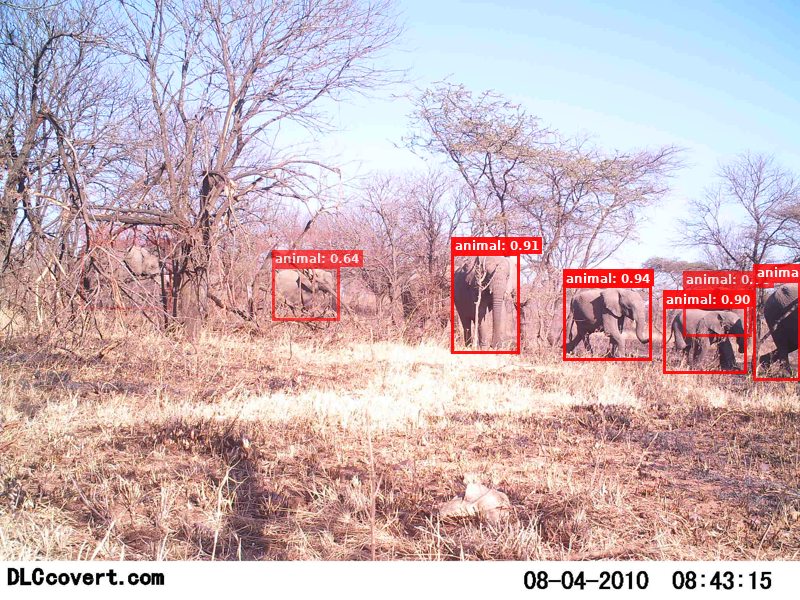

In [21]:
first_prediction_item = predictions_dict["predictions"][0]
img = load_rgb_image(first_prediction_item["filepath"])
detections = first_prediction_item["detections"]
img.thumbnail(size=(800, 800))
draw_bboxes(img, detections)